## Data Modeling 

### Supervised classification problem

So lets start by applying multiple algorithm and checking for accuracy ,  Cross Validation score and confusion matrix

We will apply these algorithms K Nearest Neighbor, Naive Bayes, Random Forest, Linear Regression, and Support Vector Machines (SVM)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cleaned Data.csv')

In [3]:
df = df.set_index('Customer_ID')
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid6_10,marital,models,months,new_cell,numbcars,phones,refurb_new,rv,truck
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,3260,998,940,1,0,0,0,0,0,1903,...,0,3,1,54,1,3,1,0,0,0
1000003,1739,50,553,0,0,0,0,0,0,2593,...,0,2,0,51,2,2,1,0,0,0
1000004,7747,37,2377,0,0,0,0,0,0,2609,...,0,2,0,53,2,1,0,0,0,0
1000005,13937,2479,4868,0,0,0,0,0,0,2814,...,0,3,3,50,2,1,5,0,0,0
1000007,1772,0,553,0,0,0,0,0,0,2618,...,0,2,2,46,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099977,5400,303,553,0,222,2626,1377,0,0,2422,...,0,2,0,23,1,2,0,0,0,0
1099982,6574,32,3069,0,0,0,0,0,0,2581,...,1,3,2,23,1,0,2,0,0,0
1099985,22107,3487,5353,0,6,57,0,25,54,2618,...,0,4,2,20,1,2,2,0,0,0


# Random Forest

In [4]:
X= df.drop(['churn'],axis=1)
X

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid6_10,marital,models,months,new_cell,numbcars,phones,refurb_new,rv,truck
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,3260,998,940,1,0,0,0,0,0,1903,...,0,3,1,54,1,3,1,0,0,0
1000003,1739,50,553,0,0,0,0,0,0,2593,...,0,2,0,51,2,2,1,0,0,0
1000004,7747,37,2377,0,0,0,0,0,0,2609,...,0,2,0,53,2,1,0,0,0,0
1000005,13937,2479,4868,0,0,0,0,0,0,2814,...,0,3,3,50,2,1,5,0,0,0
1000007,1772,0,553,0,0,0,0,0,0,2618,...,0,2,2,46,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099977,5400,303,553,0,222,2626,1377,0,0,2422,...,0,2,0,23,1,2,0,0,0,0
1099982,6574,32,3069,0,0,0,0,0,0,2581,...,1,3,2,23,1,0,2,0,0,0
1099985,22107,3487,5353,0,6,57,0,25,54,2618,...,0,4,2,20,1,2,2,0,0,0


In [5]:
y=pd.DataFrame(df['churn'])
y

,churn
Customer_ID,
1000001,1
1000003,1
1000004,0
1000005,0
1000007,1
...,...
1099977,0
1099982,1
1099985,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res_train = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res_train)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res_train)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res_train)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res_train))))

        res_cross = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("The cross validation score are: ","\n", res_cross,"\n")
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res_cross)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res_cross)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=15)

rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

pred_rf = rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_rf[:,1], pos_label=1)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30315
           1       1.00      1.00      1.00     30660

    accuracy                           1.00     60975
   macro avg       1.00      1.00      1.00     60975
weighted avg       1.00      1.00      1.00     60975


Confusion Matrix: 
 [[30315     0]
 [    0 30660]]

ROC AUC: 1.0000

The cross validation score are:  
 [0.61085602 0.62430305 0.6069203  0.60708429 0.62348311 0.61128424
 0.61768083 0.61161227 0.60882401 0.60882401] 

Average Accuracy: 	 0.6131
Accuracy SD: 		 0.0061

******************************

Test Result:

accuracy score: 0.6215

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      7621
           1       0.62      0.64      0.63      7623

    accuracy                           0.62     15244
   macro avg       0.62  

### K-Nearest neighbours

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X_train, y_train)

print_score(knn, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(knn, X_train, X_test, y_train, y_test, train=False)

pred_knn = knn.predict_proba(X_test)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_knn[:,1], pos_label=1)

Train Result:

accuracy score: 0.5836

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.62      0.60     30315
           1       0.59      0.55      0.57     30660

    accuracy                           0.58     60975
   macro avg       0.58      0.58      0.58     60975
weighted avg       0.58      0.58      0.58     60975


Confusion Matrix: 
 [[18690 11625]
 [13763 16897]]

ROC AUC: 0.5838

The cross validation score are:  
 [0.56608724 0.56083962 0.56641522 0.55231223 0.55624795 0.55256684
 0.55174676 0.55305888 0.55830736 0.554371  ] 

Average Accuracy: 	 0.5572
Accuracy SD: 		 0.0053

******************************

Test Result:

accuracy score: 0.5588

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.59      0.57      7621
           1       0.56      0.53      0.55      7623

    accuracy                           0.56     15244
   macro avg       0.56  

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

clf_lr.fit(X_train, y_train)

print_score(clf_lr, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(clf_lr, X_train, X_test, y_train, y_test, train=False)

pred_lr = clf_lr.predict_proba(X_test)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_lr[:,1], pos_label=1)

Train Result:

accuracy score: 0.5788

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.57      0.58     30315
           1       0.58      0.58      0.58     30660

    accuracy                           0.58     60975
   macro avg       0.58      0.58      0.58     60975
weighted avg       0.58      0.58      0.58     60975


Confusion Matrix: 
 [[17423 12892]
 [12793 17867]]

ROC AUC: 0.5787

The cross validation score are:  
 [0.57477862 0.58101017 0.5792063  0.57264677 0.57805838 0.58274561
 0.57602099 0.58438576 0.57634902 0.56486797] 

Average Accuracy: 	 0.5770
Accuracy SD: 		 0.0053

******************************

Test Result:

accuracy score: 0.5824

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      7621
           1       0.58      0.59      0.58      7623

    accuracy                           0.58     15244
   macro avg       0.58  

### Gaussian Navie Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()

clf_gnb.fit(X_train, y_train)

print_score(clf_gnb, X_train, X_test, y_train, y_test, train=True)
print("\n******************************\n")
print_score(clf_gnb, X_train, X_test, y_train, y_test, train=False)

pred_gnb = clf_gnb.predict_proba(X_test)
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_test, pred_gnb[:,1], pos_label=1)

Train Result:

accuracy score: 0.5356

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.32      0.41     30315
           1       0.53      0.75      0.62     30660

    accuracy                           0.54     60975
   macro avg       0.54      0.53      0.51     60975
weighted avg       0.54      0.54      0.51     60975


Confusion Matrix: 
 [[ 9745 20570]
 [ 7745 22915]]

ROC AUC: 0.5344

The cross validation score are:  
 [0.52984585 0.54919646 0.53296163 0.53279764 0.52820597 0.5391176
 0.52517632 0.53944563 0.53682139 0.52845662] 

Average Accuracy: 	 0.5342
Accuracy SD: 		 0.0068

******************************

Test Result:

accuracy score: 0.5387

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.32      0.41      7621
           1       0.53      0.75      0.62      7623

    accuracy                           0.54     15244
   macro avg       0.55   

### Support vector machine

In [12]:
#from sklearn.svm import SVC

#clf_svm = SVC(kernel='linear')

#clf_svm.fit(X_train, y_train)

#print_score(clf_svm, X_train, X_test, y_train, y_test, train=True)
#print("\n******************************\n")
#print_score(clf_svm, X_train, X_test, y_train, y_test, train=False)

#pred_svm = clf_svm.predict_proba(X_test)
#fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, pred_svm[:,1], pos_label=1)

## ROC Curve

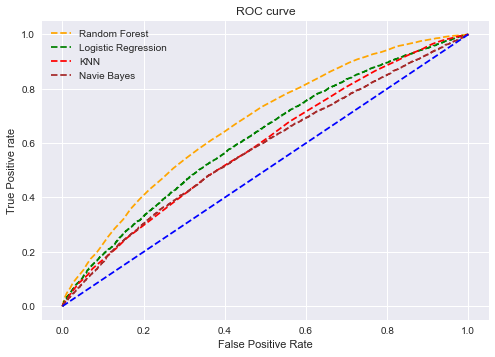

In [15]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='red', label='KNN')
#plt.plot(fpr_svm, tpr_svm, linestyle='--',color='brown', label='SVM')
plt.plot(fpr_gnb,tpr_gnb, linestyle='--',color='brown', label='Navie Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Conclusion

It is evident from the plot that the AUC for the Random Forest ROC curve is higher than that other ROC curves. Therefore, we can say that Random forest did a better job of classifying the positive class in the dataset.